# Riistaonnettomuudet Suomen tieliikenteessä 2017-2021



## Projektin tarkoitus

Tässä data-analytiikkaprojektissa tutkitaan Tilastokeskuksen julkistamaa sumalaista riistaonnettomuusaineistoa. Aineistoa analysoidaan ja visualisoidaan Pythonilla hyödyntäen kirjastoja Pandas, Seaborn ja Matplotlib. Projektissa etsitään vastauksia seuraaviin kysymyksiin:   

* Mitkä riistaeläimet ovat useimmiten olleet osallisina tieliikenneonnettomuuksissa?
* Kuinka paljon erilaisia tieliikenteen riistaonnettomuuksia on tapahtunut Suomessa vuosittain? Entä vuodenajoittain ja kuukausittain?
* Onko maakuntien välillä eroja riistaonnettomuuksien määrissä?      
* Onko tielajien välillä eroa riistaonnettomuuksien määrissä?  

Kysymyksiin etsitään vastauksia data-analytiikan menetelmin, ja tuloksia havainnollistetaan erilaisten visualisointien avulla.

# Aineisto

Tehtävän aineisto on ladattu Tilastokeskuksen [Avoin data](https://stat.fi/org/avoindata/index.html) -sivustolta 16.12.2024, ja se sisältää dataa Suomessa sattuneista riistaonnettomuuksista sijainnin mukaan vuosina 2017-2021. Aineisto on yhtenä CSV-tiedostona. 
Riistaonnettomuudet-tilasto on tuotettu kokeellisena tilastona, ja lisätietoa siitä on luettavissa Tilastokeskuksen [Riistaonnettomuudet-sivulta](https://stat.fi/tup/kokeelliset-tilastot/riistaonnettomuudet/index.html). 

## Datan tuonti 

Luetaan csv-tiedosto datakehikkoon *df* ja katsotaan, miltä sen alku näyttää.

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [192]:
df = pd.read_csv("riista.csv", parse_dates = ["tapahtumaAika"], encoding = "latin1")

In [193]:
df.head()

,id,tapahtumaAika,vuosi,kuukausi,x,y,kunta,kuntaNimi,maakunta,maakuntaNimi,tielaji,tielajis,tieNumero,tieYllapito,tieYllapitoNimi,riistalaji,riistalajiNimi
0,1,2017-12-10 16:55:00+02:00,2017,12,278773.659,6980877.550,743,Seinäjoki,14,Etelä-Pohjanmaa,3,Valtatie,18.0,1.0,Valtio,47507,Metsäkauris
1,2,2017-09-03 13:00:00+03:00,2017,9,397501.008,7503083.730,261,Kittilä,19,Lappi,4,Kantatie,80.0,1.0,Valtio,47503,Hirvi
2,3,2017-09-18 07:00:00+03:00,2017,9,418353.841,7514104.657,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi
3,4,2017-12-01 17:00:00+02:00,2017,12,488970.827,6722504.397,285,Kotka,8,Kymenlaakso,5,Seututie,357.0,1.0,Valtio,47629,Valkohäntäpeura
4,5,2017-09-18 07:00:00+03:00,2017,9,418766.580,7506930.833,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi


Tutkitaan aineistoa hieman:

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63942 entries, 0 to 63941
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               63942 non-null  int64  
 1   tapahtumaAika    63942 non-null  object 
 2   vuosi            63942 non-null  int64  
 3   kuukausi         63942 non-null  int64  
 4   x                63938 non-null  float64
 5   y                63938 non-null  float64
 6   kunta            63942 non-null  int64  
 7   kuntaNimi        63942 non-null  object 
 8   maakunta         63942 non-null  int64  
 9   maakuntaNimi     63942 non-null  object 
 10  tielaji          63942 non-null  int64  
 11  tielajis         63942 non-null  object 
 12  tieNumero        54512 non-null  float64
 13  tieYllapito      63938 non-null  float64
 14  tieYllapitoNimi  63942 non-null  object 
 15  riistalaji       63942 non-null  int64  
 16  riistalajiNimi   63942 non-null  object 
dtypes: float64(4

Infotiedoista huomataan, että aineisto on varsin maltillisen kokoinen sisältäen tiedot 64 000 riistaonnettomuudestas. Aineisto ei sisällä puuttuvia arvoja, ja sarakkeiden tietotyypit ovat pääsääntöisesti tarkoituksenmukaiset. Tämä helpottaa esikäsittelyä, sillä puuttuvia arvoja sisältävien havaintojen käsittelyä ei tarvitse nyt pohtia. *'tapahtumaAika'* on kuitenkin väärin, sillä sitä ei ole tulkittu oikein datetime-muotoiseksi aikaleimaksi. Korjataan tämä:

In [195]:
# 'Standardinmukainen ISO 8601 -kirjoitusasu auttaa kansainvälisessä viestiliikenteessävälttämään sekaannusta, 
# joka johtuu monista erilaisista kansallisista merkintätavoista.'
# utc = true: huomioi paikallisen UTC-ajan palautetussa aikaleimassa

df['tapahtumaAika'] = pd.to_datetime(df['tapahtumaAika'], format='ISO8601', utc=True)

df['tapahtumaAika'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 63942 entries, 0 to 63941
Series name: tapahtumaAika
Non-Null Count  Dtype              
--------------  -----              
63942 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 499.7 KB


In [196]:
df['tapahtumaAika'].head(10)

0          2017-12-10 14:55:00+00:00
1          2017-09-03 10:00:00+00:00
2          2017-09-18 04:00:00+00:00
3          2017-12-01 15:00:00+00:00
4          2017-09-18 04:00:00+00:00
5          2017-12-10 20:30:00+00:00
6   2017-09-16 05:24:56.709000+00:00
7          2017-09-09 05:30:00+00:00
8          2017-04-07 14:00:00+00:00
9   2017-12-28 22:24:42.249000+00:00
Name: tapahtumaAika, dtype: datetime64[ns, UTC]

Aineistossa kesä- (UTC+03:00) ja talviaika (UTC+02:00) on merkitty onnettomuushetken aikaleimaan, ja se aiheuttaa haasteita kellonajan käsittelyssä. Tässä on päädytty ratkaisuun muuntaa kellonajat UTC-yleisaikaan. Tarvittaessa ne voidaan myöhemmin muuntaa takaisin paikalliseen aikaan.

Varmistetaan, että aineistossa ei ole havaintoja muilta kuin tarkastelujaksoon kuuluvalta jaksolta, ts. vain vuosilta 2017-2021.

In [214]:
# Lajitellaan aineisto tapahtuma-ajan mukaan nousevaan järjestykseen:
df.sort_values(by = 'tapahtumaAika')
df.head()

,id,tapahtumaAika,vuosi,kuukausi,x,y,kunta,kuntaNimi,maakunta,maakuntaNimi,tielaji,tielajis,tieNumero,tieYllapito,tieYllapitoNimi,riistalaji,riistalajiNimi,vuodenaika
0,1,2017-12-10 14:55:00+00:00,2017,12,278773.659,6980877.550,743,Seinäjoki,14,Etelä-Pohjanmaa,3,Valtatie,18.0,1.0,Valtio,47507,Metsäkauris,talvi
1,2,2017-09-03 10:00:00+00:00,2017,9,397501.008,7503083.730,261,Kittilä,19,Lappi,4,Kantatie,80.0,1.0,Valtio,47503,Hirvi,syksy
2,3,2017-09-18 04:00:00+00:00,2017,9,418353.841,7514104.657,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi,syksy
3,4,2017-12-01 15:00:00+00:00,2017,12,488970.827,6722504.397,285,Kotka,8,Kymenlaakso,5,Seututie,357.0,1.0,Valtio,47629,Valkohäntäpeura,talvi
4,5,2017-09-18 04:00:00+00:00,2017,9,418766.580,7506930.833,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi,syksy


In [219]:
df['tapahtumaAika'].min()

Timestamp('2016-12-31 23:36:00+0000', tz='UTC')

In [217]:
df['tapahtumaAika'].max()

Timestamp('2021-12-31 21:30:00+0000', tz='UTC')

Jostain syystä ainakin yksi rivi on hieman erimuotoisen aikaleiman takia päätynyt mukaan ennen tarkastelujakson alkua. Poistetaan se datakehikosta:

In [223]:
df = df[df.tapahtumaAika != '2016-12-31 23:36:00+0000']

# Tarkastetaan, mikä kirjattu onnettomuus on nyt varhaisin:
df['tapahtumaAika'].min()

Timestamp('2017-01-01 02:20:00+0000', tz='UTC')

Nyt aikajakso on oikein. 

Tarkastetaan seuraavaksi, sisältääkö data duplikaattirivejä, eli saman onnettomuuden kirjaamista useamman kerran:

In [224]:
duplikaatti = df[df.duplicated()]
duplikaatti

,id,tapahtumaAika,vuosi,kuukausi,x,y,kunta,kuntaNimi,maakunta,maakuntaNimi,tielaji,tielajis,tieNumero,tieYllapito,tieYllapitoNimi,riistalaji,riistalajiNimi,vuodenaika


Ei sisällä, mikä on hyvä juttu. Tämä data on siistiä ja ehjää jo valmiiksi, ja on periaatteessa jo valmis analyysiä varten. Lisätään aineistoon kuitenkin uusi sarake *vuodenaika* onnettomuuskuukauden perusteella:

In [225]:
vuodenajat = {
    1: "talvi",
    2: "talvi",
    3: "kevät",
    4: "kevät",
    5: "kevät",
    6: "kesä",
    7: "kesä",
    8: "kesä",
    9: "syksy",
    10: "syksy",
    11: "syksy",
    12: "talvi"}

df['vuodenaika'] = df['kuukausi'].map(vuodenajat)     # map-metodin parametrina sanakirja 'vuodenajat'

df.head()

,id,tapahtumaAika,vuosi,kuukausi,x,y,kunta,kuntaNimi,maakunta,maakuntaNimi,tielaji,tielajis,tieNumero,tieYllapito,tieYllapitoNimi,riistalaji,riistalajiNimi,vuodenaika
0,1,2017-12-10 14:55:00+00:00,2017,12,278773.659,6980877.550,743,Seinäjoki,14,Etelä-Pohjanmaa,3,Valtatie,18.0,1.0,Valtio,47507,Metsäkauris,talvi
1,2,2017-09-03 10:00:00+00:00,2017,9,397501.008,7503083.730,261,Kittilä,19,Lappi,4,Kantatie,80.0,1.0,Valtio,47503,Hirvi,syksy
2,3,2017-09-18 04:00:00+00:00,2017,9,418353.841,7514104.657,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi,syksy
3,4,2017-12-01 15:00:00+00:00,2017,12,488970.827,6722504.397,285,Kotka,8,Kymenlaakso,5,Seututie,357.0,1.0,Valtio,47629,Valkohäntäpeura,talvi
4,5,2017-09-18 04:00:00+00:00,2017,9,418766.580,7506930.833,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi,syksy


## Datan kuvailu

Tutkitaan seuraavaksi tarkemmin, millaista dataa aineisto sisältää.

In [226]:
df.shape

(63941, 18)

Kuten aiemmin jo huomattiin, aineistossa on noin 64 000 havaintoa (ts. riviä), ja 18 saraketta. Sarakkeet ovat seuraavat:

In [227]:
df.columns

Index(['id', 'tapahtumaAika', 'vuosi', 'kuukausi', 'x', 'y', 'kunta',
       'kuntaNimi', 'maakunta', 'maakuntaNimi', 'tielaji', 'tielajis',
       'tieNumero', 'tieYllapito', 'tieYllapitoNimi', 'riistalaji',
       'riistalajiNimi', 'vuodenaika'],
      dtype='object')

Tutkitaan aineistoa seuraavaksi tilastollisten tunnuslukujen avulla. 

In [228]:
df.describe()

,id,vuosi,kuukausi,x,y,kunta,maakunta,tielaji,tieNumero,tieYllapito,riistalaji
count,63941.000000,63941.000000,63941.000000,63937.000000,6.393700e+04,63941.000000,63941.000000,63941.000000,54511.000000,63937.000000,63941.000000
mean,31971.994432,2019.143226,7.731502,331630.326107,6.801940e+06,488.233950,5.528972,5.134014,5340.125388,5.573283,48345.901300
std,18458.330708,1.379382,3.304163,92557.494589,1.420554e+05,278.794042,4.904556,1.994678,14572.571113,20.213973,10879.599234
min,1.000000,2017.000000,1.000000,184684.566700,6.638455e+06,5.000000,1.000000,1.000000,1.000000,1.000000,47484.000000
25%,15987.000000,2018.000000,5.000000,261715.757110,6.712820e+06,232.000000,2.000000,3.000000,18.000000,1.000000,47507.000000
50%,31972.000000,2019.000000,8.000000,316714.541000,6.760531e+06,503.000000,4.000000,5.000000,180.000000,1.000000,47629.000000
75%,47957.000000,2020.000000,11.000000,380399.970000,6.826637e+06,734.000000,6.000000,6.000000,2174.000000,1.000000,47629.000000
max,63942.000000,2021.000000,12.000000,708725.063000,7.768064e+06,992.000000,19.000000,9.000000,91541.000000,99.000000,200556.000000


*describe*-metodin antamista tilastollisista tunnusluviusta ei tässä ole juurikaan hyötyä, sillä vaikka monet arvoista ovatkin numeromuotoisia, niillä ei ole mielekästä tehdä laskutoimituksia (kuten vaikkapa vuodella tai kunnan numerolla). Yllä olevia tietoja tarkastelemalla kuitenkin huomataan, että aineiston arvot vaikuttavat uskottavilta, esimerkiksi kuukausissa minimi on 1 ja maksimi 12. # Datan analysointia

Katsotaan sitten, kuinka paljon eri riistaonnettomuuksia on tapahtunut eri vuosina.

# Datan analysointia

Tässä osassa tutkitaan, millaisia asioista datasta saadaan irti. Tuloksia pyritään selventämään erilaisia visualisointeja hyödyntämällä.

## Eri riistalajien yleisyys onnettomuuksissa

Selvitetään ensimmäiseksi, missä määrin eri riistalajit ovat olleet osallisina tieliikenneonnettomuuksissa.

In [229]:
onnettomuudet = df.groupby('riistalajiNimi').size()

# Muutetaan takaisin dataframeksi, ja annetaan uudelle sarakkeelle nimi:
onnettomuudet = onnettomuudet.reset_index(name='onnettomuuksien_lkm') 

onnettomuudet = onnettomuudet.sort_values(by = 'onnettomuuksien_lkm')

onnettomuudet

,riistalajiNimi,onnettomuuksien_lkm
1,Kuusipeura,87
5,Villisika,168
3,Metsäpeura,325
0,Hirvi,9193
2,Metsäkauris,22466
4,Valkohäntäpeura,31702


Visualisoidaan tuloksia pylväskaavion avulla:

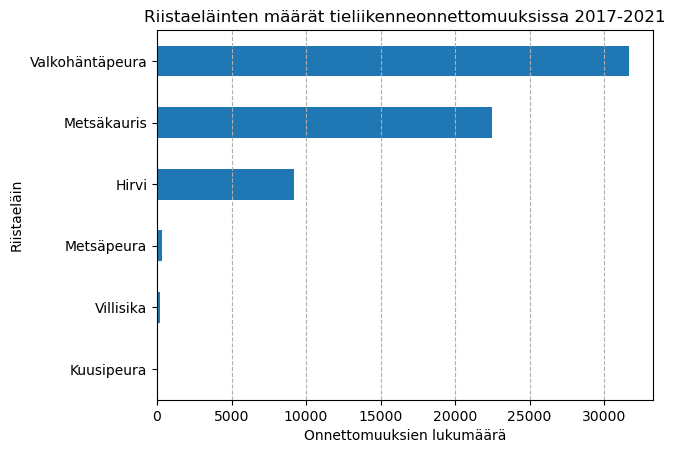

In [230]:
ax = onnettomuudet.plot.barh(x = 'riistalajiNimi',
                             title = 'Riistaeläinten määrät tieliikenneonnettomuuksissa 2017-2021',
                             xlabel = 'Onnettomuuksien lukumäärä',
                             ylabel = 'Riistaeläin',
                             legend = False)

plt.grid(axis = 'x', linestyle = '--')

plt.show()

Yllä olevasta kaaviosta huomataan selvästi, että kolme merkittävintä tieliikenneonnettomuuksissa mukana ollutta riistaeläintä ovat valkohäntäpeura, metsäkauris ja hirvi. Näihin verrattuna metsäpeuran, villisian ja kuusipeuran määrät onnettomuuksissa ovat jääneet hyvin pieniksi.  

Tutkitaan seuraavaksi, kuinka paljon erilaisia riistaonnettomuuksia on tapahtunut vuositasolla tarkastelujakson aikana.

## Riistaonnettomuudet vuosittain

In [231]:
tulokset = df.groupby(['vuosi', 'riistalajiNimi']).size()

# Muutetaan takaisin dataframeksi, ja annetaan uudelle sarakkeelle nimi:
tulokset = tulokset.reset_index(name='onnettomuuksien_lkm') 

print(tulokset)

    vuosi   riistalajiNimi  onnettomuuksien_lkm
0    2017            Hirvi                 2021
1    2017       Kuusipeura                   11
2    2017      Metsäkauris                 2991
3    2017       Metsäpeura                   63
4    2017  Valkohäntäpeura                 5085
5    2017        Villisika                   30
6    2018            Hirvi                 1956
7    2018       Kuusipeura                   10
8    2018      Metsäkauris                 4052
9    2018       Metsäpeura                   53
10   2018  Valkohäntäpeura                 6251
11   2018        Villisika                   28
12   2019            Hirvi                 2009
13   2019       Kuusipeura                   19
14   2019      Metsäkauris                 4792
15   2019       Metsäpeura                   73
16   2019  Valkohäntäpeura                 6507
17   2019        Villisika                   33
18   2020            Hirvi                 1527
19   2020       Kuusipeura              

Onnettomuuksien määriä on helpompi vertailla kaavioista. Tehdään kaaviot riistaonnettomuuksien kokonaismäärille vuosittain, sekä riistalajeihin jaoteltuna:

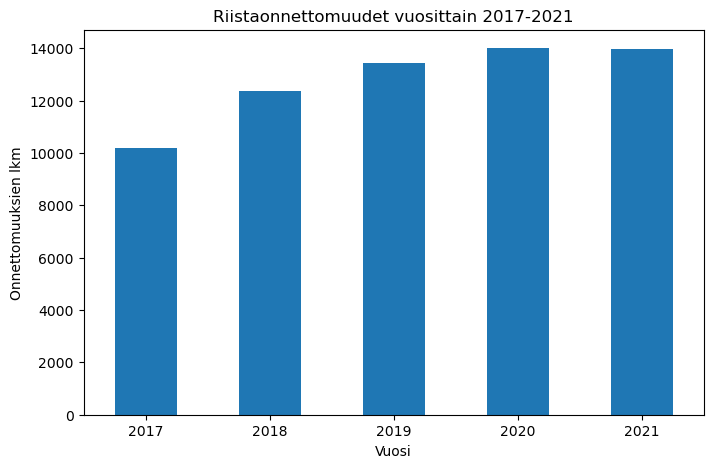

In [232]:
# Riistaonnettomuuksia yhteensä vuosittain:
vuosittain = tulokset.groupby('vuosi')['onnettomuuksien_lkm'].sum()

# Pylväskaavio:
vuosittain.plot(kind='bar', title = "Riistaonnettomuudet vuosittain 2017-2021", figsize=(8, 5))

plt.ylabel('Onnettomuuksien lkm')
plt.xlabel('Vuosi')
plt.xticks(rotation = 0)

plt.show()

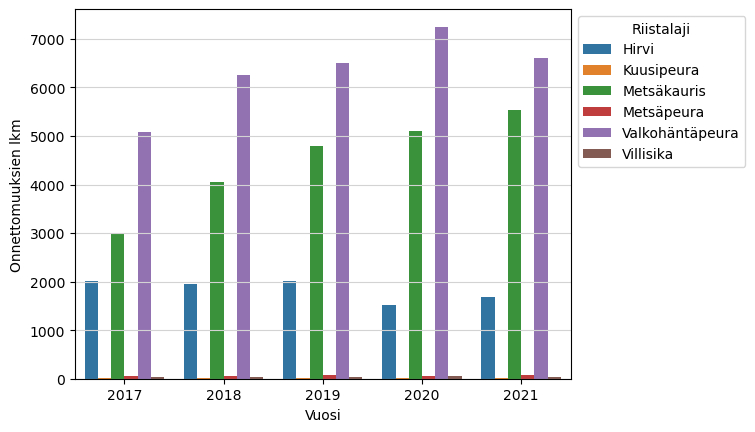

In [233]:
# Pylväskaaviot joka riistalajille:
ax = sns.barplot(tulokset, x = 'vuosi', y = 'onnettomuuksien_lkm', hue = 'riistalajiNimi')

# Asetetaan selitelaatikon paikka kaavion ulkopuolelle:
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = 'Riistalaji')

plt.ylabel('Onnettomuuksien lkm')
plt.xlabel('Vuosi')
plt.grid(axis = 'y', color = "lightgray")

plt.show()

Kaavoista nähdään, että riistaonnettomuudet ovat kasvaneet tarkastelujakson aikana noin 10 000 onnettomuudesta 14 000 onnettomuuteen vuodessa. Joka vuonna suurin osa onnettomuuksista on tapahtunut valkohäntäpeuran kanssa, ja toiseksi eniten onnettomuuksia on tapahtunut metsäkauriin kanssa. Jakson aikana metsäkaurisonnettomuudet ovat liki kaksinkertaistuneet, ja myös valkohäntäpeuraonnettomuudet ovat lisääntyneet aina vuoteen 2020 saakka. Hirvionnettomuuksien vuotuinen määrä sen sijaan on 2020-luvulla hieman vähentynyt aiempiin vuosiin verrattuna.   

## Riistaonnettomuudet kuukausittain

Otetaan tarkasteluun kolme useimmiten onnettomuuksissa osallisena ollutta riistalajia, valkohäntäpeura, metsäkauris ja hirvi, ja tutkitaan, miten riistaonnettomuudet ovat vaihdelleet kuukausittain tarkastelujakson aikana. Lisätään uusi muuttuja jokaiselle kuukaudelle erikseen muodossa *'05/2021'*.

In [234]:
# Muodostetaan datakehikko 'df2', jossa mukana vain valkohäntäpeura-, metsäkauris- ja hirvionnettomuudet:
df2 = df[df['riistalajiNimi'].isin(['Valkohäntäpeura', 'Metsäkauris', 'Hirvi'])].copy()

# Lisätään uusi muuttuja 'kkVuosi':
df2['kkVuosi'] = df2['tapahtumaAika'].dt.to_period('M')

# Järjestellään aineisto nousevaan järjestykseen (ts. vanhimmasta uusimpaan) sarkkeen 'kkVuosi' mukaan:
df2.sort_values('kkVuosi', inplace=True)

df2.head()

/var/folders/56/3c1pdtpj08d9bqrxfybmzzwc0000gp/T/ipykernel_95077/3782981363.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2['kkVuosi'] = df2['tapahtumaAika'].dt.to_period('M')


,id,tapahtumaAika,vuosi,kuukausi,x,y,kunta,kuntaNimi,maakunta,maakuntaNimi,tielaji,tielajis,tieNumero,tieYllapito,tieYllapitoNimi,riistalaji,riistalajiNimi,vuodenaika,kkVuosi
801,802,2017-01-30 06:57:00+00:00,2017,1,277850.369,6805144.903,790,Sastamala,6,Pirkanmaa,9,Yksityinen tie,NaN,99.0,Ei tietoa,47507,Metsäkauris,talvi,2017-01
554,555,2017-01-03 22:18:00+00:00,2017,1,329917.045,6660136.669,149,Inkoo,1,Uusimaa,5,Seututie,186.0,1.0,Valtio,47629,Valkohäntäpeura,talvi,2017-01
10101,10102,2017-01-15 04:30:00+00:00,2017,1,511616.712,6801451.713,491,Mikkeli,10,Etelä-Savo,9,Yksityinen tie,NaN,3.0,Yksityinen,47503,Hirvi,talvi,2017-01
556,557,2017-01-16 05:10:00+00:00,2017,1,221459.988,6726099.757,481,Masku,2,Varsinais-Suomi,6,Muu maantie,1900.0,1.0,Valtio,47629,Valkohäntäpeura,talvi,2017-01
559,560,2017-01-22 13:53:00+00:00,2017,1,512450.560,6810726.143,491,Mikkeli,10,Etelä-Savo,3,Valtatie,15.0,1.0,Valtio,47503,Hirvi,talvi,2017-01


Ryhitellään seuraavaksi riistaonnettomuudet kuukausittain ja eläinlajeittain:

In [235]:
kk_ryhm = df2.groupby(['kkVuosi', 'riistalajiNimi']).size().reset_index(name = 'onnettomuuksien_lkm')
kk_ryhm 

,kkVuosi,riistalajiNimi,onnettomuuksien_lkm
0,2017-01,Hirvi,96
1,2017-01,Metsäkauris,152
2,2017-01,Valkohäntäpeura,365
3,2017-02,Hirvi,66
4,2017-02,Metsäkauris,124
...,...,...,...
175,2021-11,Metsäkauris,662
176,2021-11,Valkohäntäpeura,1414
177,2021-12,Hirvi,170
178,2021-12,Metsäkauris,528


Pivotoidaan data siten, että riistaeläimet ovat omilla sarakkeillaan, ja kuukaudet indeksinä: 

In [239]:
pivot = kk_ryhm.pivot(index = 'kkVuosi', columns = 'riistalajiNimi', values = 'onnettomuuksien_lkm')
pivot.head()

riistalajiNimi,Hirvi,Metsäkauris,Valkohäntäpeura
kkVuosi,,,
2017-01,96,152,365
2017-02,66,124,162
2017-03,39,113,161
2017-04,51,158,211
2017-05,113,409,290


Tehdään datasta nyt viivakaavio, jossa jokainen riistaeläinlaji on omana viivanaan:

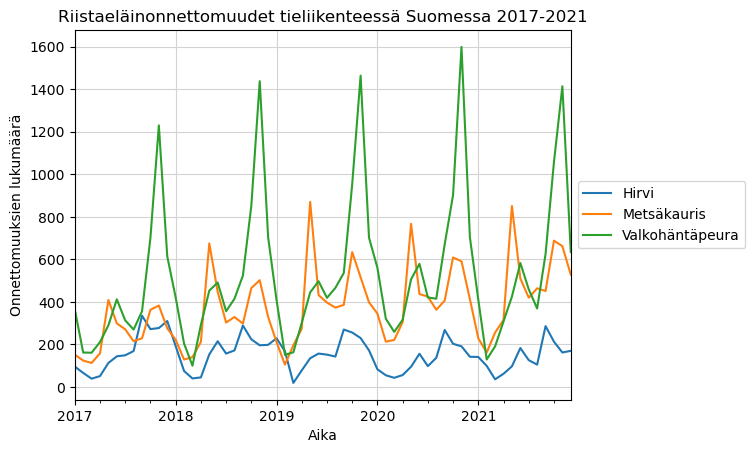

In [243]:
# Kaavio ja otsikko:
pivot.plot(title = 'Riistaeläinonnettomuudet tieliikenteessä Suomessa 2017-2021')

# Sijoitetaan selitelaatikko kuvion ulkopuolelle:
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Lisätään akselien otsikot:
plt.ylabel('Onnettomuuksien lukumäärä')
plt.xlabel('Aika')

# Lisätään ruudukko: 
plt.grid(axis = 'both', color = "lightgray")

plt.show()

## Maakuntien väliset erot

Analysoidaan, missä maakunnassa sattuu eniten riistaonnettomuuksia.

Visualisointi: kartta, jossa maakunnat on värjätty onnettomuuksien määrän perusteella?

### Tielajien merkitys

Miten onnettomuuksia sattuu erilaisilla tielajeilla (esim. päätiet vs. pienemmät tiet) 

### Ennustava malli?

Mitä ennustetaan millä?